# Named Entity Recognition (NER)

It is a NLP task to identify important named entities in the text.

也就是說，辨認text出現的重要字詞，並分類成正確的類別。例如： <br/>
1. Joseph --> people
2. Coventry, London --> places
3. Amazon, Apple --> organisations
4. Today --> date, time

以及更多的類型

---

了解重要的entity代表的意義後，就可以進行簡單的QA，例如回答Who、What、When、Where等等簡單的問題

以下圖(愛因斯坦的維基百科內容)為例，許多字詞都被標註成不同的類別

![](Image/Image9.jpg)

---

## NER in Python

nltk 和 The Stanford CoreNLP Library 都有提供**NER**的功能

---

#### Stanford CoreNLP Library (Java based)：
可以透過nltk來操作Stanford CoreNLP library執行named entity recognition，也可以用他自己的API來操作(可以處理更進階的NER)

用Stanford CoreNLP Library做NER之前必須經過一些前置作業：
1. Installing required Java files
2. Setting system environment variables

Stanford CoreNLP Library不只可以用來做NER，也可以做：
1.  Coreference (linking pronouns and entities together)
2.  Dependency Tree (parsing meaning and relationships amongst words or phrases in a sentence

#### nltk的NER：
較為簡單，處理結果也比較不複雜

---

這裡我們採用nltk的內建函數來達成NER處理

In [1]:
import nltk

# Define the sentence for NER
sentence = "In New Work, I like to ride the Metro to visit MOMA and some restaurants rated well by Ruth Reichl."

第一步：Tokenisation

In [2]:
tokenized_sent = nltk.word_tokenize(sentence)
tokenized_sent

['In',
 'New',
 'Work',
 ',',
 'I',
 'like',
 'to',
 'ride',
 'the',
 'Metro',
 'to',
 'visit',
 'MOMA',
 'and',
 'some',
 'restaurants',
 'rated',
 'well',
 'by',
 'Ruth',
 'Reichl',
 '.']

第二步：將text標上parts of speech (根據句型來標籤詞性)

執行pos_tag之前，必須先下載所需的corpus，並告知nltk我們把corpus存在哪

In [3]:
# 下載一個檔案
# nltk.download('averaged_perceptron_tagger', "D:/Programming Exercises/Datacamp/Python/Introduction to Natural Language Processing in Python/Corpus/Parts_of_speech_Corpus")
nltk.data.path.append('./Corpus/Parts_of_speech_Corpus/')

tagged_sent = nltk.pos_tag(tokenized_sent)
tagged_sent

[('In', 'IN'),
 ('New', 'NNP'),
 ('Work', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('like', 'VBP'),
 ('to', 'TO'),
 ('ride', 'VB'),
 ('the', 'DT'),
 ('Metro', 'NNP'),
 ('to', 'TO'),
 ('visit', 'VB'),
 ('MOMA', 'NNP'),
 ('and', 'CC'),
 ('some', 'DT'),
 ('restaurants', 'NNS'),
 ('rated', 'VBN'),
 ('well', 'RB'),
 ('by', 'IN'),
 ('Ruth', 'NNP'),
 ('Reichl', 'NNP'),
 ('.', '.')]

上面的結果是一個由多個tuples組成的list。其中，每個tuple代表一個字。tuple的第一個element代表字，第二個element代表詞性

看前三個結果： <br/>
('In', 'IN'), ('New', 'NNP'), ('Work', 'NNP')

"New"和"York"分別被標上NNP (代表proper noun, singular)

第三步：將tagged_sent傳入nltk.ne_chunk函數 (named entity chunk)，會將sentence回傳成tree，tree的leaves和subtrees代表更複雜的文法

在此之前，要下載相對應的corpus，並告知nltk我們把corpus存在哪

In [4]:
# 下載兩個檔案
# nltk.download('maxent_ne_chunker', "D:/Programming Exercises/Datacamp/Python/Introduction to Natural Language Processing in Python/Corpus/NamedEntityRecognition_Corpus")
# nltk.download('words', "D:/Programming Exercises/Datacamp/Python/Introduction to Natural Language Processing in Python/Corpus/NamedEntityRecognition_Corpus")
nltk.data.path.append('./Corpus/NamedEntityRecognition_Corpus/')

print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP Work/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


上面的結果，"New"和"York"被合併成同一個entity (GPE: geographical entity)，還有MOMA and Metro被標為organisation

此外，Ruth Reichl也成功被identify為一個人

---

課堂練習一：

In [84]:
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

In [85]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

In [86]:
# Path to the parts_of_speech corpus
nltk.data.path.append('./Corpus/Parts_of_speech_Corpus/')
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
pos_sentences

[[('\ufeffThe', 'JJ'),
  ('taxi-hailing', 'JJ'),
  ('company', 'NN'),
  ('Uber', 'NNP'),
  ('brings', 'VBZ'),
  ('into', 'IN'),
  ('very', 'RB'),
  ('sharp', 'JJ'),
  ('focus', 'VB'),
  ('the', 'DT'),
  ('question', 'NN'),
  ('of', 'IN'),
  ('whether', 'IN'),
  ('corporations', 'NNS'),
  ('can', 'MD'),
  ('be', 'VB'),
  ('said', 'VBD'),
  ('to', 'TO'),
  ('have', 'VB'),
  ('a', 'DT'),
  ('moral', 'JJ'),
  ('character', 'NN'),
  ('.', '.')],
 [('If', 'IN'),
  ('any', 'DT'),
  ('human', 'JJ'),
  ('being', 'VBG'),
  ('were', 'VBD'),
  ('to', 'TO'),
  ('behave', 'VB'),
  ('with', 'IN'),
  ('the', 'DT'),
  ('single-minded', 'JJ'),
  ('and', 'CC'),
  ('ruthless', 'JJ'),
  ('greed', 'NN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('company', 'NN'),
  (',', ','),
  ('we', 'PRP'),
  ('would', 'MD'),
  ('consider', 'VB'),
  ('them', 'PRP'),
  ('sociopathic', 'JJ'),
  ('.', '.')],
 [('Uber', 'NNP'),
  ('wanted', 'VBD'),
  ('to', 'TO'),
  ('know', 'VB'),
  ('as', 'RB'),
  ('much', 'JJ'),
  ('as', 'IN'),

In [87]:
# Path to the named entity corpus
nltk.data.path.append('./Corpus/NamedEntityRecognition_Corpus/')
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
chunked_sentences

<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000001EF47C280C8>

**注意**：<br/>
這裡的nltk.ne_chunk_sents()裡面的binary = True代表只要透過corpora判斷文章內句子中的文字是不是 name entity 而已。<br/>
如果設定 binary = False，則會透過corpora判斷這些詞屬於哪個 name entity

In [80]:
# 把所有被標籤為NE的詞印出來
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


hasattr()主要用來去看 **chunk** 這個物件裡面有沒有 "label" 這個屬性。如果有，就回傳True；反之，則回傳False。

例如這裡的chunk_sentences中 (下圖)：<br/>
(NE Uber/NNP) 是一個chunk，wanted/VBD 是一個chunk，to/TO 也是一個chunk；所有S底下的東西都是chunks。但這裡只有(NE Uber/NNP)有 **NE** 這個label，因此遇到這個chunk時，hasattr()函數會回傳True。

![](Image/Image10.jpg)

**S其實也是一種label，不過由於我們用兩層迴圈，因此只會去尋找所有S底下的chunks。**

---

---

課堂練習二：畫出一張圓餅圖，用來展示一段文件(articles)中各詞性所佔的比例

In [63]:
articles = '\ufeffImage copyright EPA Image caption Uber has been criticised many times over the way it runs its business\r\n\r\n\r\nRide-sharing firm Uber is facing a criminal investigation by the US government.\r\n\r\n\r\nThe scrutiny has started because the firm is accused of using "secret" software that let it operate in regions where it was banned or restricted.\r\n\r\n\r\nThe software, called "greyball", helped it identify officials seeking to stop the service running.\r\n\r\n\r\nA spokesman for Uber declined to comment on the investigation, reported the Reuters news agency.\r\n\r\n\r\nIt is claimed greyball was used in several areas, including Portland, Oregon, where the ride service was still seeking official approval to operate.\r\n\r\n\r\nBookings blocked\r\n\r\n\r\nIn those areas, transport regulation officials posed as passengers in a bid to prove that the company was operating illegally. Greyball worked out who the officials were and blocked them from booking rides with the company\'s drivers.\r\n\r\n\r\nIn a letter sent last week to transport regulators in Portland, Uber said it used the greyball software "exceedingly sparingly" in the city and had not used it since April 2015 when it was granted permission to operate.\r\n\r\n\r\nUber\'s use of the software was revealed by the New York Times earlier this year. Uber defended its use in a blog saying the software helped it work out if a ride request was legitimate. It helped Uber limit fraud and protect drivers from harm, it added.\r\n\r\n\r\nIt is not clear what sanctions Uber will face if the investigation finds that it did act illegally.\r\n\r\n\r\nThe criminal inquiry comes at a difficult time for Uber which has faced criticism on many fronts. It is currently fighting a lawsuit from Google-backed self-driving car firm Waymo.Despite all the current hype about the rise of voice-assisted devices using Alexa and Siri, linguistics researcher Rachael Tatman found people complaining on social media that the technology still doesn’t understand them.\r\n\r\n\r\nThat’s especially true with regional accents of people who live in the South or are from countries like New Zealand, Tatman said last week during a conference in San Francisco.\r\n\r\n\r\n“So this is the whatever the opposite of delight is as a user experience,” she said. “People are so upset that they’re going on Twitter and yelling about it.”\r\n\r\n\r\nTatman, a doctoral candidate with the University of Washington’s linguistics department, was one of the speakers at a two-day Virtual Assistant Summit, which wrapped up Friday at the Park Central Hotel. The conference, and an adjacent Deep Learning Summit, drew about 600 people representing companies that are working on advancing artificial intelligence, machine learning and robotics.\r\n\r\n\r\nLots of people are already using those technologies in programs like Apple’s Siri. They are moving beyond mobile phones and into smart-home devices like Amazon’s Echo. Other fast-changing technologies include artificial intelligence and consumer robotics, especially with self-driving cars on the horizon.\r\n\r\n\r\nBut there’s still work to be done in each of those areas, speakers said. For example, artificial speech recognition technologies still fall short of the way humans can quickly learn and discern speech patterns from each other in “as little as two sentences,” Tatman said.\r\n\r\n\r\nBut that’s because humans take into account other factors, such as the gender of person talking or whether they’ve previously met someone from the the same region, she said.\r\n\r\n\r\nTatman examined YouTube’s automatic captioning program, which can translate spoken words into text in several languages. She found that more errors showed up in translations from speakers who had a Southern accent than from people who lived in California.\r\n\r\n\r\n“The South is the largest demographic region in the United States,” she said. “If you’re using a voice-based virtual assistant and you can’t deal with Southern speech, you’re going to have problems reaching this market.”\r\n\r\n\r\nFor businesses trying to serve those markets, speech recognition technology could be crucial to future revenue, said Stephen Scarr, CEO of search services Info.com and eContext.\r\n\r\n\r\nWith 20 percent of all searches already done through voice, “this is really important, this is No. 1 on your radar,” Scarr told the developers.\r\n\r\n\r\nAs an example of the challenge, a recent YouTube video showed Amazon’s Alexa misunderstanding a young boy’s request to play a song, and instead offering to play an audio porn channel.\r\n\r\n\r\nThe conference touched on more than just speech technologies. Alonso Martinez, a Pixar Animation Studios technical director, said robot developers could take cues from the ways animators create deep emotional connections with audiences.\r\n\r\n\r\n“When you’re thinking about a robot, don’t think about it as a generic, faceless thing,” said Martinez, who developed characters in “Up” and “Inside Out,” two of the Emeryville company’s hit movies. “You need to ask what makes them admirable. What are the values that they have that I wish that I had in myself?”\r\n\r\n\r\nElena Corina Grigore of Yale University’s Social Robotics Lab said robots now used in manufacturing can work by themselves because they are easily trained to perform specialized, repetitive tasks. But robots are not well-equipped to collaborate with humans, she said.\r\n\r\n\r\nThat’s slowly changing with advances in artificial intelligence. As an example, Grigore played a video of a robot trained to help a person with what can be a complex and maddening task — assembling a chair from Ikea.\r\n\r\n\r\nStill, Grigore said, “We’re not getting replaced by robots anytime soon. We’re not at a point where the robots have the intelligence or the physical capabilities necessary to perform all of these actions on their own. Anything that is related to common sense or creativity or types of thinking that require on-the-spot flexibility in a dynamic and changing environment is still very hard to achieve for us.”\r\n\r\n\r\nBenny Evangelista is a San Francisco Chronicle staff writer. Email: bevangelista@sfchronicle.com Twitter: @ChronicleBenny The French electorate heads to the polls in the second round of presidential elections on May 7, followed by votes in Britain and Germany in the coming months. Computer scientists, tech giants and start-ups are using sophisticated algorithms and reams of online data to quickly — and automatically — spot fake news faster than traditional fact-checking groups can.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nThe goal, experts say, is to expand these digital tools across Europe, so the region can counter the fake news that caused so much confusion and anger during the United States presidential election in November, when outright false reports routinely spread like wildfire on Facebook and Twitter.\r\n\r\n\r\n“Algorithms will have to do a lot of the heavy lifting when it comes to fighting misinformation,” said Claire Wardle, head of strategy and research at First Draft News, a nonprofit organization that has teamed up with tech companies and newsrooms to debunk fake reports about elections in the United States and Europe. “It’s impossible to do all of this by hand.”\r\n\r\n\r\nResearchers have tried to learn from the United States’ run-in with fake news, but the problem in Europe has mutated, experts say, making it impossible to merely replicate American responses to the issue.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nEuropean countries have different languages, and their media markets are smaller than those in the United States. That means groups that set up fake news sites in the United States, seeking to profit from online advertising when false claims were shared on social media, are less prevalent in Europe.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nSo far, outright fake news stories have been relatively rare. Instead, false reports have more often come from Europeans on social media taking real news out of context, as well as from fake claims spread by state-backed groups like Sputnik, the Russian news organization.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nBut with fake news already swirling around Europe’s forthcoming elections, analysts also worry that technology on its own may not be enough to combat the threat.\r\n\r\n\r\n“There’s an increased amount of misinformation out there,” said Janis Sarts, director of the NATO Strategic Communications Center of Excellence, a think tank in Riga, Latvia, that will hold a hackathon with local coders in May to find potential tech solutions to this trend. “State-based actors have been trying to amplify specific views to bring them into the mainstream.”\r\n\r\n\r\nCalls for combating fake news have focused on some of the biggest online players, including American giants like Facebook and Google.\r\n\r\n\r\nInterested in all things tech? The daily Bits newsletter will keep you updated on the latest from Silicon Valley and the technology industry, plus exclusive analysis from our reporters and editors. Please verify you\'re not a robot by clicking the box. Invalid email address. Please re-enter. You must select a newsletter to subscribe to. Sign Up Receive occasional updates and special offers for The New York Times\'s products and services. Thank you for subscribing. An error has occurred. Please try again later. View all New York Times newsletters.\r\n\r\n\r\nAfter criticism of its role in spreading false reports during the United States elections, Facebook introduced a fact-checking tool ahead of the Dutch elections in March and the first round of the French presidential election on April 23. It also removed 30,000 accounts in France that had shared fake news, a small fraction of the approximately 33 million Facebook users in the country.\r\n\r\n\r\nPhoto\r\n\r\n\r\nNot everyone, though, has embraced Facebook’s response.\r\n\r\n\r\nMost German publishers, for instance, have so far balked at participating in the company’s fact-checking efforts, saying it is the responsibility of the social network, not them, to debunk such claims. German lawmakers are mulling potential hefty fines against tech companies if they do not clamp down on fake news and online hate speech.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nSince last year, Google also has funded almost 20 European projects aimed at fact-checking potentially false reports. That includes its support for two British groups looking to use artificial intelligence to automatically fact-check online claims ahead of the country’s June 8 parliamentary election.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nIt similarly has teamed up with French newsrooms to create digital tools, including ways to track trending topics during that country’s election.\r\n\r\n\r\nDavid Dieudonné, head of the company’s news lab in France, said the project had debunked 43 reports since February (arguably a relatively small figure), including claims that Saudi Arabia was funding the campaign of Emmanuel Macron, the leading candidate.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\n“We’re trying something new,” Mr. Dieudonné said. “There’s no easy answer for this complicated issue.”\r\n\r\n\r\nNot all potential solutions, though, are being driven by Silicon Valley’s big beasts.\r\n\r\n\r\nDavid Chavalarias, a French academic, has created a digital tool that has analyzed more than 80 million Twitter messages about the French election, helping journalists and fact-checkers to quickly review claims that are spread on the social network.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nAfter the presidential election in the United States last year, Dean Pomerleau, a computer scientist at Carnegie Mellon University in Pittsburgh, also challenged his followers on Twitter to come up with an algorithm that could distinguish fake claims from real news.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nWorking with Delip Rao, a former Google researcher, he offered a $2,000 prize to anyone who could meet his requirements. By early this year, more than 100 teams from around the world had signed on to Mr. Pomerleau’s Fake News Challenge.\r\n\r\n\r\nUsing a database of verified articles and their artificial intelligence expertise, rival groups — a combination of college teams, independent programmers and groups from existing tech companies — already have been able to accurately predict the veracity of certain claims almost 90 percent of the time, Mr. Pomerleau said. He hopes that figure will rise to the mid-90s before his challenge ends in June.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\n“This is just Round 1 of what we want to do,” said Mr. Pomerleau, who expects the teams to share their work with fact-checking groups worldwide. “Next, we want to move toward multimedia content like videos.”\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\nIn the rush to find solutions to fake news, some within the industry are taking a decidedly more low-tech approach.\r\n\r\n\r\nJimmy Wales, the founder of Wikipedia, recently started a crowdfunding campaign to create a news organization that would combine professional journalists with digital volunteers, who would contribute to reports in a way similar to how articles are created on Wikipedia.\r\n\r\n\r\nPart fact-checking site, part traditional newsroom, the project — called Wikitribune — was inspired by the effect of misinformation on the United States presidential election. Mr. Wales said his project would choose subject areas based on the interests of the community of volunteers and paying subscribers to the service, relying more on traditional reporting techniques than high-tech wizardry.\r\n\r\n\r\nAdvertisement Continue reading the main story\r\n\r\n\r\n“The real impetus for this was fake news,” he said. “We want people to get behind topics, and then we’ll hire staff to cover them.” Ruchir Sharma, chief global strategist at Morgan Stanley Investment Management, is the author of “The Rise and Fall of Nations: Forces of Change in the The Post-Crisis World,” from which this essay is adapted.\r\n\r\n\r\n\r\n\r\n\r\n\r\nA robot collects dishes to be cleaned at Chilli Padi Nonya Cafe in Singapore. (REUTERS/Edgar Su)\r\n\r\n\r\nThe United Nations forecasts that the global population will rise from 7.3 billion to nearly 10 billion by 2050, a big number that often prompts warnings about overpopulation. Some have come from neo-Malthusians, who fear that population growth will outstrip the food supply, leaving a hungry planet. Others appear in the tirades of anti-immigrant populists, invoking the specter of a rising tide of humanity as cause to slam borders shut. Still others inspire a chorus of neo-Luddites, who fear that the “rise of the robots” is rapidly making human workers obsolete, a threat all the more alarming if the human population is exploding.\r\n\r\n\r\nBefore long, though, we’re more likely to treasure robots than to revile them. They may be the one thing that can protect the global economy from the dangers that lie ahead.\r\n\r\n\r\nAn increase of 2.5 billion people may sound catastrophic. But what matters for economic growth is not the number of people but the rate of population growth. Since its peak in the 1960s, that rate has slumped by almost half to just 1 percent, and the U.N. forecast assumes that this slowdown will continue. Women are having fewer children, so fewer people are entering the working ages between 15 and 64, and labor-force growth is poised to decline from Chile to China. At the same time, owing to rapid advances in health care and medicine, people are living longer , and most of the coming global population increase will be among the retirement crowd. These trends are toxic for economic growth, and boosting the number of robots may be the easiest answer for many countries.\r\n\r\n\r\nOne simple way to estimate how fast an economy can grow is by adding working-age population growth and productivity growth: If the number of workers and output per worker are both increasing by 1 percent a year, then economic output should rise by roughly 2 percent. Over the past decade, both sides of that equation have declined dramatically across the world. In the United States, productivity growth has fallen by almost half from its postwar average, but growth in the labor force has slid even faster, dropping by two-thirds to an average pace of 0.5 percent, according to calculations performed for my book. Though many explanations have been offered for the slow recovery from the global financial crisis of 2008, the clearest answer may be aging populations. Something will have to fill the void left by, say, retiring farmers, and particularly at a time of rising hostility to immigrants, it is likely to be farmbots.\r\n\r\n\r\nIt may not be long before economists are worrying about a global shortage of robots. In many industrial countries, from Germany to Japan to South Korea, growth in the working-age population has already peaked, acting as a drag on the economy. Widely overlooked, however, is the fact that the population-growth slowdown is unfolding even faster in the emerging world, according to my research.\r\n\r\n\r\nConsider the turning point that China hit last year. For the first time since records began in the 1950s, its working-age population growth was negative. As a result, China’s labor force is expected to lose 1 million workers each year for the foreseeable future, and it is also aging rapidly. Studies by Evercore ISI, a research firm, show that the elderly share of the population is rising more than twice as fast as it did in the United States and more than four times faster than in France at similar stages of development. Asked by an alarmed dinner companion about the threat robots posed to jobs in China, Nobel economist Daniel Kahneman responded: “You just don’t get it. In China, the robots are going to come just in time.” No wonder Beijing now offers heavy subsidies to companies involved in industrial automation.\r\n\r\n\r\nAnd timing is critical. Those who fear the job-destroying impact of machines say this generation of technology is different because it is coming so fast. If older generations created tools for use by humans, such as sewing machines, the new forms of automation are imbued with artificial intelligence, capable of “machine learning” and of rapidly replacing humans in a broad swath of jobs, from manufacturing to services — even jobs that involve writing about robots. Concern about this disruptive advance has been stirred up by authorities such as Oxford University researchers Carl Benedikt Frey and Michael Osborne, who predicted in 2013 that nearly half of U.S. jobs would be at risk from automation in the next decade or two.\r\n\r\n\r\nThese alarms have sounded before, however. The Machine Intelligence Research Institute at the University of California at Berkeley has found that today, the average forecast for when artificial intelligence will arrive is about 20 years. But that was also the standard prediction in 1955. And often, humans find a way of working with their automated creations. After the introduction of supermarket scanners, the number of cashiers grew. Though legal-discovery software appeared to threaten the jobs of paralegals, their ranks increased, too. Now, many fear that self-driving trucks will displace millions of American truckers, but they may create more and better jobs for those who service those increasingly complex vehicles.\r\n\r\n\r\nIf automation was displacing human workers as fast as implied in recent books like Martin Ford’s “The Rise of the Robots,” then we should be seeing a negative impact on jobs already. We’re not. Since 2008, economic growth has been weak compared with that in other post-crisis recoveries, but job growth in the major industrial countries has been relatively strong. In the Group of Seven, the world’s top industrial countries, unemployment has fallen faster than expected in the face of weak economic growth, and faster than in any comparable period since at least the 1970s. The Japanese economy is growing at 0.8 percent, yet it is at full employment. According to my research, the job picture has been particularly strong in Germany, Japan and South Korea — the industrial countries that employ the most robots .\r\n\r\n\r\nTrue, robots do represent a new obstacle for some poorer nations, namely those few that do not suffer from population decline. In the postwar era, countries like China escaped poverty by moving a rising young population off the farm and into more productive jobs in factories. Indeed, it was unusual for any country to sustain rapid growth unless the working-age population was increasing faster than 2 percent a year. My analysis shows that, in the 1980s, 17 of the 20 largest emerging economies had a working-age population expanding that fast, according to my research, but now there are only two: Nigeria and Saudi Arabia. And they will have a hard time moving a large segment of their young populations into industrial jobs, given that they now have to compete with robotic manufacturing elsewhere.\r\n\r\n\r\nYet for the rising number of countries facing population decline, the effort to lift the labor force has begun. Starting in the 1980s, led by Singapore, nations from Chile to Australia have offered baby bonuses for women to have more children, but many have found that these bonuses are ineffective in the face of stronger cultural forces, including the desire of many women to pursue a career before having children. Others have tried with some success to boost the workforce directly by raising the retirement age, offering women incentives to join or return to the labor force after having kids, and opening doors to immigrant workers.\r\n\r\n\r\nThe simple math, however, shows that particularly in rapidly aging, conservative societies such as Japan and Germany, none of these groups has the potential to make up for coming declines in the working-age population. Germany decided to admit roughly 1 million refugees in 2015, in part for economic reasons, but the resulting controversy has reduced the flow. Germany would have to admit 1.5 million each year through 2030 to fully offset the economic impact of its aging population. Japan, which on average admits fewer than 70,000 immigrants per year, would have to admit 1 million annually. Given the widespread political backlash against immigration, increases this large are unlikely.\r\n\r\n\r\nSo far, robots are drawing comparatively little populist fire, perhaps in part because their numbers are still quite low. Worldwide, the industrial labor force includes about 320 million humans, compared with just 1.6 million robots. That’s a huge gap, even counting the superior strength and speed of the robots. And most of them fall in the category of unintelligent machines, committed to a single task such as turning a bolt or painting a car door. Nearly half of them work in the auto industry, which is still the largest employer (of humans) in the United States.\r\n\r\n\r\nIn the future, economists may start counting robots the way they now count gains in the working-age population, as a driver of growth. For much of the world, robots will stand alongside immigrants, women and the elderly as a fourth pool of labor.\r\n\r\n\r\nWhether by design or accident, many of the countries with the most rapidly aging populations already have the most robots. According to the International Federation of Robotics, the nations with the highest density of industrial robots include South Korea, with 531 per 10,000 employees, Japan with 305 and Germany with 301. The United States ranks eighth with 176. China is well behind with only 49, but on the bright side — arguably — it had the world’s fastest-growing robot population.\r\n\r\n\r\nToday, population trends are the most powerful force shaping the rise and fall of nations, the starting point of any discussion about an economy’s prospects. Most of the world is graying fast, and the economic answer to aging will be all hands on deck, no matter what they’re made of. Researchers describe the ‘emotional chatting machine’ as a first attempt at the problem of creating machines that can fully understand user emotion\r\n\r\n\r\nAn “emotional chatting machine” has been developed by scientists, signalling the approach of an era in which human-robot interactions are seamless and go beyond the purely functional.\r\n\r\n\r\nThe chatbot, developed by a Chinese team, is seen as a significant step towards the goal of developing emotionally sophisticated robots.\r\n\r\n\r\nThe ECM, as it is known for short, was able to produce factually coherent answers whilst also imbuing its conversation with emotions such as happiness, sadness or disgust.\r\n\r\n\r\nProf Björn Schuller, a computer scientist at Imperial College London who was not involved in the latest advance, described the work as “an important step” towards personal assistants that could read the emotional undercurrent of a conversation and respond with something akin to empathy.\r\n\r\n\r\n“This will be the next generation of intelligence to be met in daily experience, sooner rather than later,” he said.\r\n\r\n\r\nThe paper found that 61% of humans who tested the machine favoured the emotional versions to the neutral chatbot. Similar results have been found in so-called “Wizard of Oz” studies in which a human typing responses masquerades as advanced AI.\r\n\r\n\r\n“It is not a question whether they are desirable – they clearly are – but in which applications they make sense and where they don’t,” said Schuller.\r\n\r\n\r\nMinlie Huang, a computer scientist at Tsinghua University, Beijing and co-author, said: “We’re still far away from a machine that can fully understand the user’s emotion. This is just the first attempt at this problem.”\r\n\r\n\r\n\r\n\r\n\r\n\r\nHuang and colleagues started by creating an “emotion classifying” algorithm that learned to detect emotion from 23,000 posts taken from the Chinese social media site Weibo. The posts had been manually classified by humans as sad, happy and so on.\r\n\r\n\r\nThe emotion classifier was then used to tag millions of social media interactions according to emotional content. This huge dataset served as a training ground for the chatbot to learn both how to answer questions and how to express emotion.\r\n\r\n\r\nThe resulting program could be switched into five possible modes – happy, sad, angry, disgusted, liking – depending on the user’s preference. In one example conversation a user typed in: “Worst day ever. I arrived late because of the traffic.”\r\n\r\n\r\nIn neutral mode, the chatbot droned: “You were late”. Alternative responses were: “Sometimes life just sucks!” (disgust mode), “I am always here to support you” (liking) or “Keep smiling! Things will get better” (happy – or, some might say, annoyingly chipper).\r\n\r\n\r\nIn the future, the team predict the software could also learn the appropriate emotion to express at a given time. “It could be mostly empathic,” said Huang, adding that a challenge would be to avoid the chatbot reinforcing negative feelings such as rage.\r\n\r\n\r\nUntil recently chatbots were widely regarded as a sideshow to more serious attempts at tackling machine intelligence. A chatbot known as Eugene Goostman managed to convince some judges they were talking to a human – but only by posing as a 13-year old Ukrainian boy with a limited grasp of English. Microsoft’s disastrous chatbot Tay was supposed to learn to chat from Twitter interactions, but was terminated after becoming a genocide-supporting Nazi less than 24 hours after being let loose on the internet.\r\n\r\n\r\nThe latest study shows that chatbots, driven by a machine learning approach, are starting to make significant headway. Sandra Wachter, a computer scientist at the Oxford Internet Institute, said that in future such algorithms are likely to be personalised. “Some of us prefer a tough-love pep talk, others prefer someone to rant with,” she said. “Humans often struggle with appropriate responses because of the complexity of emotions, so building technologies that could decipher accurately our ‘emotional code’ would be very impressive.”\r\n\r\n\r\nAs the stilted computer interactions of today are replaced by something approaching friendly chit-chat, new risks could be encountered.\r\n\r\n\r\n\r\n\r\n\r\n\r\nOne concern is the potential for technology designed to seduce the user into sharing sensitive personal data. “It could be that children share insights with their ‘artificial friends’ and this data might be stored,” said Wachter. “What if we were to find out that people are more likely to buy more products when they are angry, sad, or bored? The ability to detect these emotions and successfully manipulate them could be a very interesting tool for companies.”\r\n\r\n\r\nThere is also the potential for users to become emotionally dependent, or even romantically involved, with their computers.\r\n\r\n\r\n“However, there is also a huge potential for good, such as existing software to teach children on the autism spectrum [about] emotional and social interaction,” said Schuller. “One has to carefully balance benefits and risks and ensure the best exploitation.”'

In [67]:
# TOKENIZATION (轉成單字)
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(articles)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

#####################################################################################

# PARTS_OF_SPEECH TAGGING (標記詞性)
# Path to the parts_of_speech corpus
nltk.data.path.append('./Corpus/Parts_of_speech_Corpus/')
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
pos_sentences

#####################################################################################

# NAME_ENTITY_TAGGING (標記物件種類，如：人事物)
# Path to the named entity corpus
nltk.data.path.append('./Corpus/NamedEntityRecognition_Corpus/')
# Create the named entity chunks: chunked_sentences
chunked_sentences = list(nltk.ne_chunk_sents(pos_sentences, binary=False))
chunked_sentences

[Tree('S', [('\ufeffImage', 'NN'), ('copyright', 'NN'), Tree('ORGANIZATION', [('EPA', 'NNP'), ('Image', 'NNP')]), ('caption', 'NN'), ('Uber', 'NNP'), ('has', 'VBZ'), ('been', 'VBN'), ('criticised', 'VBN'), ('many', 'JJ'), ('times', 'NNS'), ('over', 'IN'), ('the', 'DT'), ('way', 'NN'), ('it', 'PRP'), ('runs', 'VBZ'), ('its', 'PRP$'), ('business', 'NN'), ('Ride-sharing', 'JJ'), ('firm', 'NN'), ('Uber', 'NNP'), ('is', 'VBZ'), ('facing', 'VBG'), ('a', 'DT'), ('criminal', 'JJ'), ('investigation', 'NN'), ('by', 'IN'), ('the', 'DT'), Tree('GPE', [('US', 'JJ')]), ('government', 'NN'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('scrutiny', 'NN'), ('has', 'VBZ'), ('started', 'VBN'), ('because', 'IN'), ('the', 'DT'), ('firm', 'NN'), ('is', 'VBZ'), ('accused', 'VBN'), ('of', 'IN'), ('using', 'VBG'), ('``', '``'), ('secret', 'JJ'), ("''", "''"), ('software', 'NN'), ('that', 'WDT'), ('let', 'VBD'), ('it', 'PRP'), ('operate', 'VB'), ('in', 'IN'), ('regions', 'NNS'), ('where', 'WRB'), ('it', 'PRP'), ('

**注意**：<br/>
這裡的nltk.ne_chunk_sents裡面的binary = False，代表 **non-binary category names**，也就是會去抓各種 name categories。

In [68]:
# import defaultdict
from collections import defaultdict

**注意**：<br/>
當使用普通的字典時，用法一般是dict = {},添加元素時只需要 dict[element] = value 即可。 <br/>
更改value的時候也是如此。例如：dict[element] = xxx <br/>
但前提是該element必須已經字典裡面，如果不在字典裡就會報錯並停下

這裡我們不想讓程式出錯，因此使用defaultdict()，並傳入一個factory function (這裡是int)，代表當element不在dictionary中時，要回傳0

統計所有的Name entity出現的次數

In [69]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1

ner_categories

defaultdict(int,
            {'ORGANIZATION': 33,
             'GPE': 115,
             'PERSON': 70,
             'LOCATION': 1,
             'FACILITY': 1})

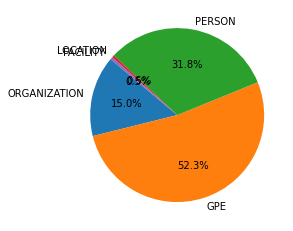

In [70]:
# 將所有的 name entity 放進一個list (labels)
labels = list(ner_categories.keys())

# 根據 labels 中 name entity 的順序把其出現的次數也放進一個list (values)
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
from matplotlib import pyplot as plt
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()